In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams

In [2]:
#load the sales  dataset
sales_train_df = pd.read_csv('train.csv')
sales_test_df = pd.read_csv('test.csv')
store_df=pd.read_csv('store.csv')

/home/gaurav/anaconda3/envs/mynewenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
sales_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [4]:
store_df.shape

(1115, 10)

In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
def hist_plot(df):
    df.hist(bins = 30, figsize = (10, 10), color = 'b');

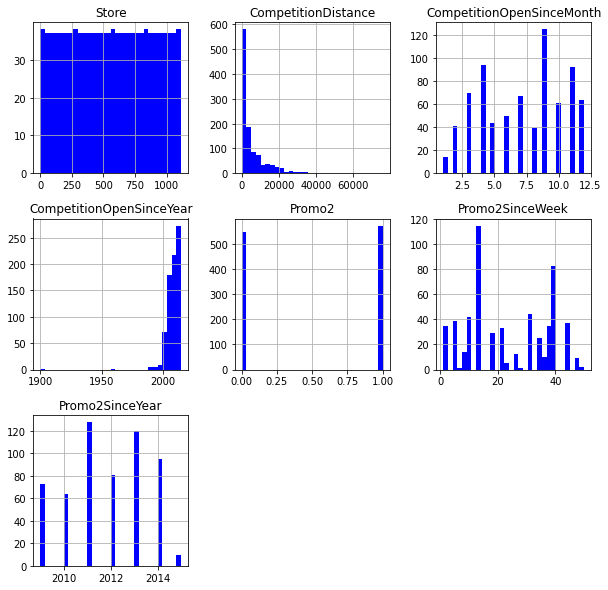

In [8]:
hist_plot(store_df)

In [9]:
# Checking Null for Data

def check_null(df):
    return df.isnull().sum()

In [10]:
check_null(sales_train_df)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
check_null(store_df)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Handling Missing Value in store data

- in CompetitionDistance only 3 values are missing we can fill that by using median.
- we cannot use same approach for CompetetionOpen(MOnth and Year) may be better to replace with 0 (ie launched recently)
- we can also impute missing value for promo columns with 0 as no any info about promo available.

In [12]:
# Replacing missing values for Competiton distance with median
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)

# Null Value of other columns replaced byt 0 as no info avialable
store_df.fillna(0, inplace=True)

# Also we have open column null in test data we replace it by most frequent onservation in this column (ie,mode)

frequent_open=sales_test_df['Open'].mode().values[0]
sales_test_df['Open'].fillna(frequent_open,inplace=True)

In [13]:
#Splitting the date into year month,year and day and adding as a new column

sales_train_df.Date = pd.to_datetime(sales_train_df.Date)
sales_train_df['Day'] = sales_train_df.Date.dt.day
sales_train_df['Month'] = sales_train_df.Date.dt.month
sales_train_df['Year'] = sales_train_df.Date.dt.year

In [14]:
# Joining the tables
train_store_joined = pd.merge(sales_train_df, store_df, on='Store', how='inner')
train_store_joined

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,...,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,30,...,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,29,...,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,28,...,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,27,...,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,5,...,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,4,...,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,3,...,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2,...,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [15]:
train_store_group=train_store_joined.groupby(by='Store')

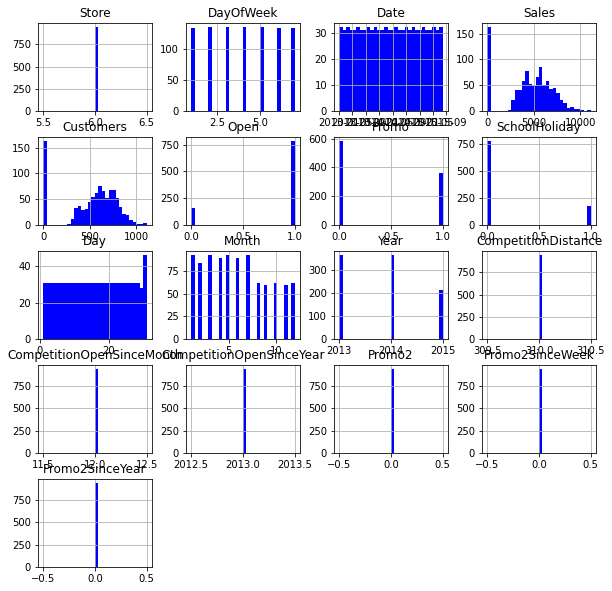

In [16]:
hist_plot(train_store_group.get_group(6))

In [17]:
def Correlation(df):
    return df.corr()

def Correlation_heatmap_plot(df):
    correlations = df.corr()
    f, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, annot = True)

In [18]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    print("\n")
    if output[1]<=0.05:
        print("Strong evidence against Null hyposthesis time series data has no unit root and Hence is Stationary")
    else:
        print("Weak evidence against Null hyposthesis time series data has unit root and Hence is Non-Stationary")

In [19]:
def make_stationary(data):
    rcParams['figure.figsize'] = 10, 6
    df_log = np.log(data)
    moving_avg = df_log.rolling(2).mean()
    std_dev = df_log.rolling(2).std()
    print(moving_avg)
    print(std_dev)
    plt.legend(loc='best')
    plt.title('Moving Average')
    plt.plot(std_dev, color ="black", label = "Standard Deviation")
    plt.plot(moving_avg, color="red", label = "Mean")
    plt.legend()
    plt.show()

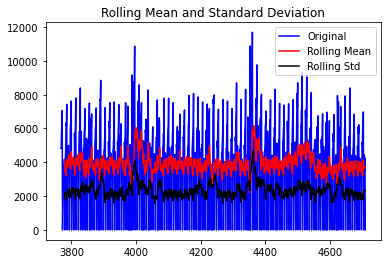

Results of dickey fuller test
Test Statistics                 -5.100817
p-value                          0.000014
No. of lags used                20.000000
Number of observations used    921.000000
critical value (1%)             -3.437470
critical value (5%)             -2.864683
critical value (10%)            -2.568444
dtype: float64


Strong evidence against Null hyposthesis time series data has no unit root and Hence is Stationary


In [20]:
test_stationarity(train_store_group.get_group(5)['Sales'])

In [21]:
train_store_joined

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,...,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,30,...,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,29,...,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,28,...,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,27,...,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,5,...,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,4,...,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,3,...,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2,...,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


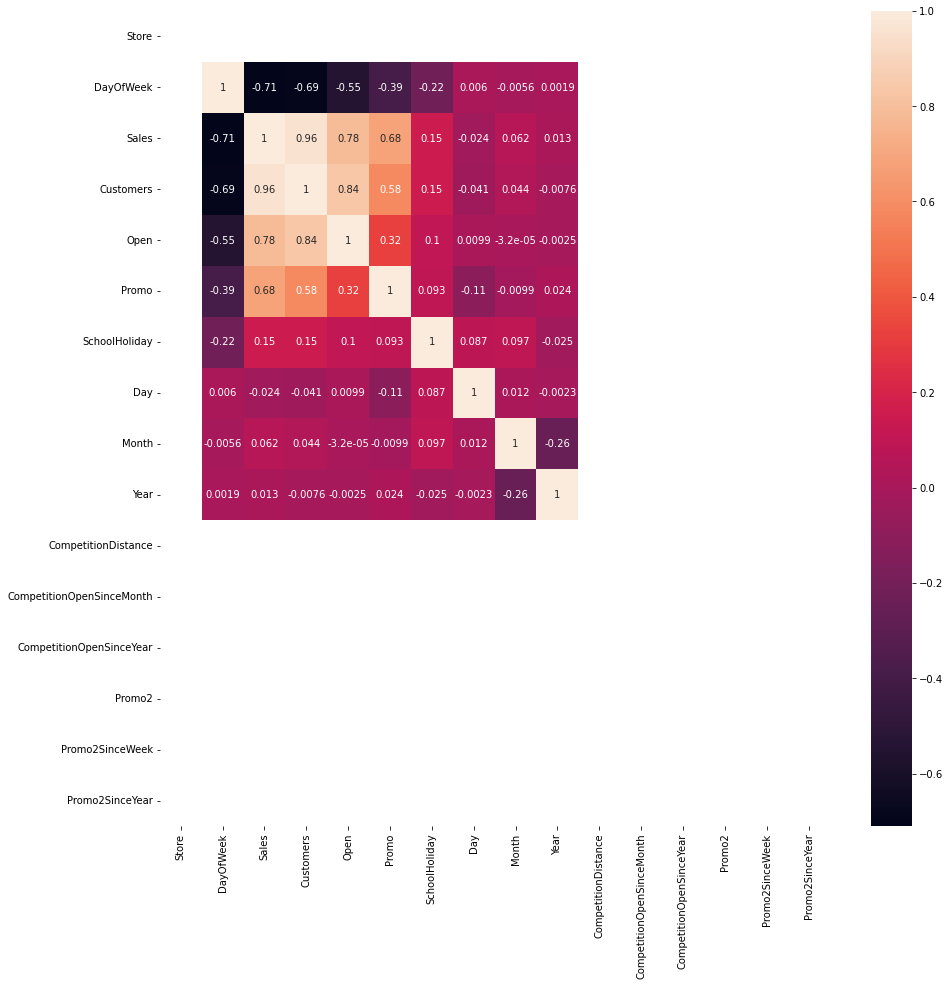

In [22]:
Correlation_heatmap_plot(train_store_group.get_group(2))

In [23]:
def scatterplot(x_name,y_name,df):
    sns.scatterplot(x=x_name,y=y_name,data=df)   

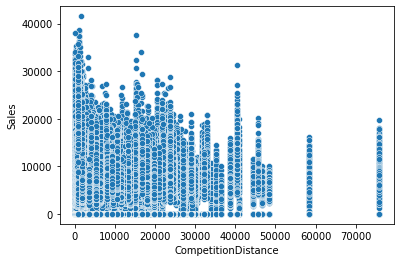

In [24]:
scatterplot('CompetitionDistance','Sales',train_store_joined)

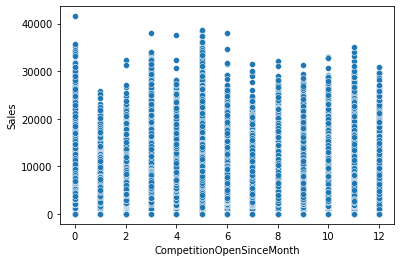

In [25]:
scatterplot('CompetitionOpenSinceMonth','Sales',train_store_joined)

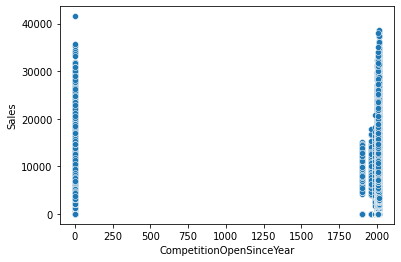

In [26]:
scatterplot('CompetitionOpenSinceYear','Sales',train_store_joined)

In [27]:
def pair_plot(x_name,y_name,z_name,df):
    plt.figure(figsize=(40, 40))
    sns.pairplot(df[[x_name,y_name,z_name]])
    plt.show()

<Figure size 2880x2880 with 0 Axes>

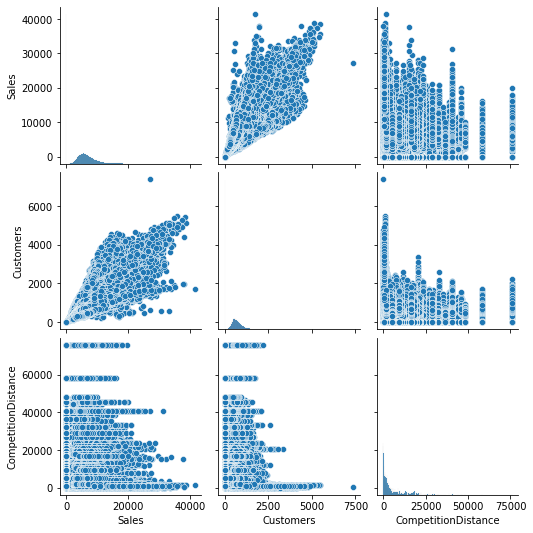

In [28]:
pair_plot('Sales','Customers','CompetitionDistance',train_store_joined)

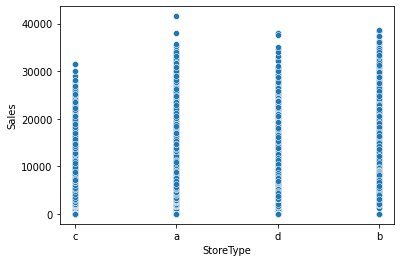

In [29]:
scatterplot("StoreType","Sales",train_store_joined)

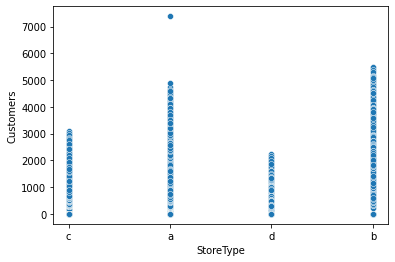

In [30]:
scatterplot("StoreType","Customers",train_store_joined)

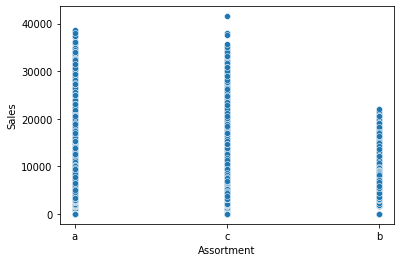

In [31]:
scatterplot("Assortment","Sales",train_store_joined)

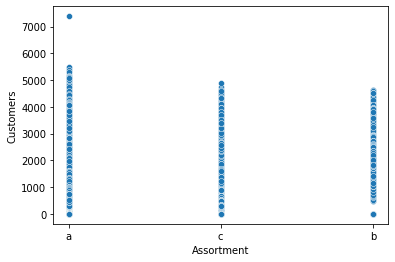

In [32]:
scatterplot("Assortment","Customers",train_store_joined)

In [33]:
def count_plot(x_name,df):
    sns.countplot(x_name,data=df)
    plt.show()

/home/gaurav/anaconda3/envs/mynewenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


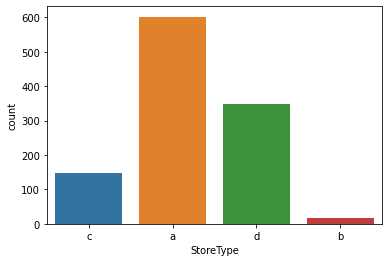

In [34]:
count_plot("StoreType",store_df)

/home/gaurav/anaconda3/envs/mynewenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


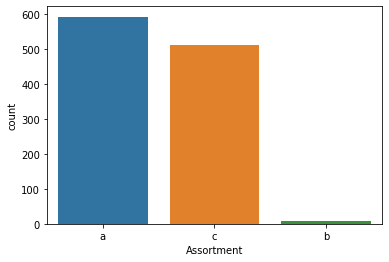

In [35]:
count_plot("Assortment",store_df)       #  a= basic b=extra, c=extended

In [36]:
def correlation_user(x_name,y_name,z_name,df):
    cor = df[[x_name,y_name,z_name]].corr()
    plt.figure(figsize = (6, 6))
    sns.heatmap(cor, annot = True,center=0.4,cmap="YlGnBu")
    plt.show()

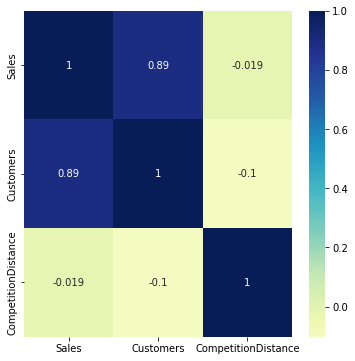

In [37]:
correlation_user('Sales','Customers','CompetitionDistance',train_store_joined)

In [38]:
train_store_joined.groupby('Store')['Customers', 'Sales'].mean()

/tmp/ipykernel_29160/3441643740.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_store_joined.groupby('Store')['Customers', 'Sales'].mean()


,Customers,Sales
Store,,
1,467.646497,3945.704883
2,486.045648,4122.991507
3,620.286624,5741.253715
4,1100.057325,8021.769639
5,444.360934,3867.110403
...,...,...
1111,373.548832,4342.968153
1112,693.498938,8465.280255
1113,596.763270,5516.180467


In [39]:
def multi_bar_plot(x,item1,item2,df):
    x_lst=df[x]
    xpos=np.arange(len(x_lst))
    plt.bar(xpos-0.2,df[item1], width=0.4, label=item1)
    plt.bar(xpos+0.2,df[item2], width=0.4,label=item2)
    plt.xticks(xpos,x_lst)
    plt.xlabel(x)
    plt.legend()
    

/tmp/ipykernel_29160/1743951956.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=train_store_joined.groupby('StoreType')['Customers', 'Sales'].mean()


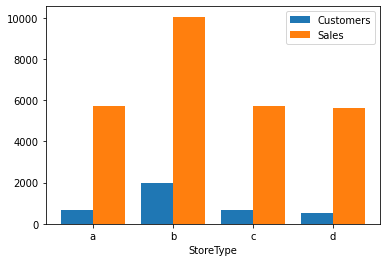

In [40]:
a=train_store_joined.groupby('StoreType')['Customers', 'Sales'].mean()
a=a.reset_index()
multi_bar_plot('StoreType','Customers','Sales',a)


/tmp/ipykernel_29160/2343218268.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b=train_store_joined.groupby('Store')['Customers', 'Sales'].mean()


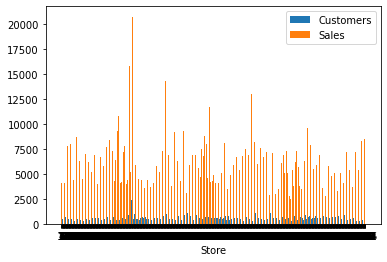

In [41]:
b=train_store_joined.groupby('Store')['Customers', 'Sales'].mean()
b=b.reset_index()
multi_bar_plot('Store','Customers','Sales',b)

In [42]:
train_store_joined.groupby('Assortment')['Customers', 'Sales'].mean()

/tmp/ipykernel_29160/120714117.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_store_joined.groupby('Assortment')['Customers', 'Sales'].mean()


,Customers,Sales
Assortment,,
a,619.164636,5481.026096
b,2046.361828,8553.931999
c,624.222733,6058.676567


In [43]:
def factor_plot(x,y,col,row,df):
    sns.factorplot(data =df, x = x, y =y, 
    col = col, # per store type in cols
    palette = 'plasma',
    hue = col,
    row = row, # per promo in the store in rows
   color = 'b') 

/home/gaurav/anaconda3/envs/mynewenv/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


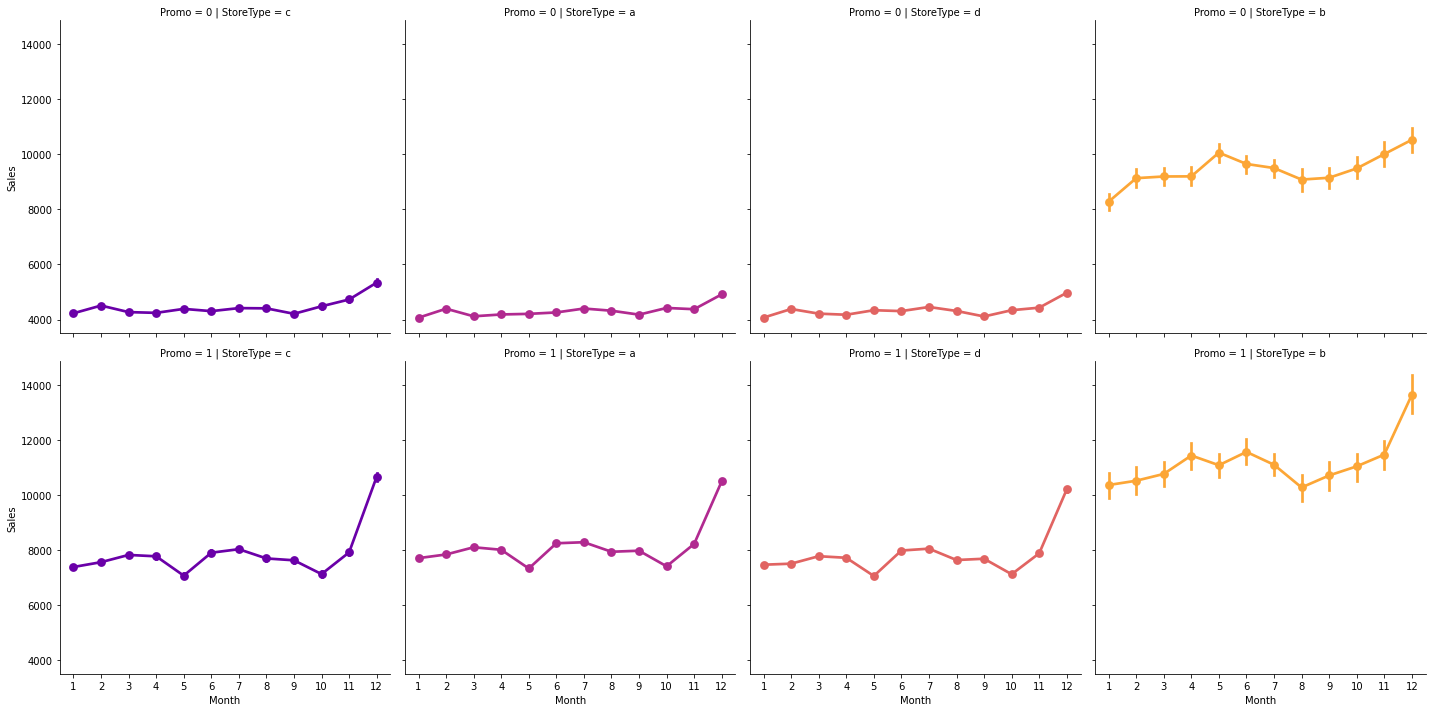

In [44]:
factor_plot("Month","Sales","StoreType","Promo",train_store_joined)

/home/gaurav/anaconda3/envs/mynewenv/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


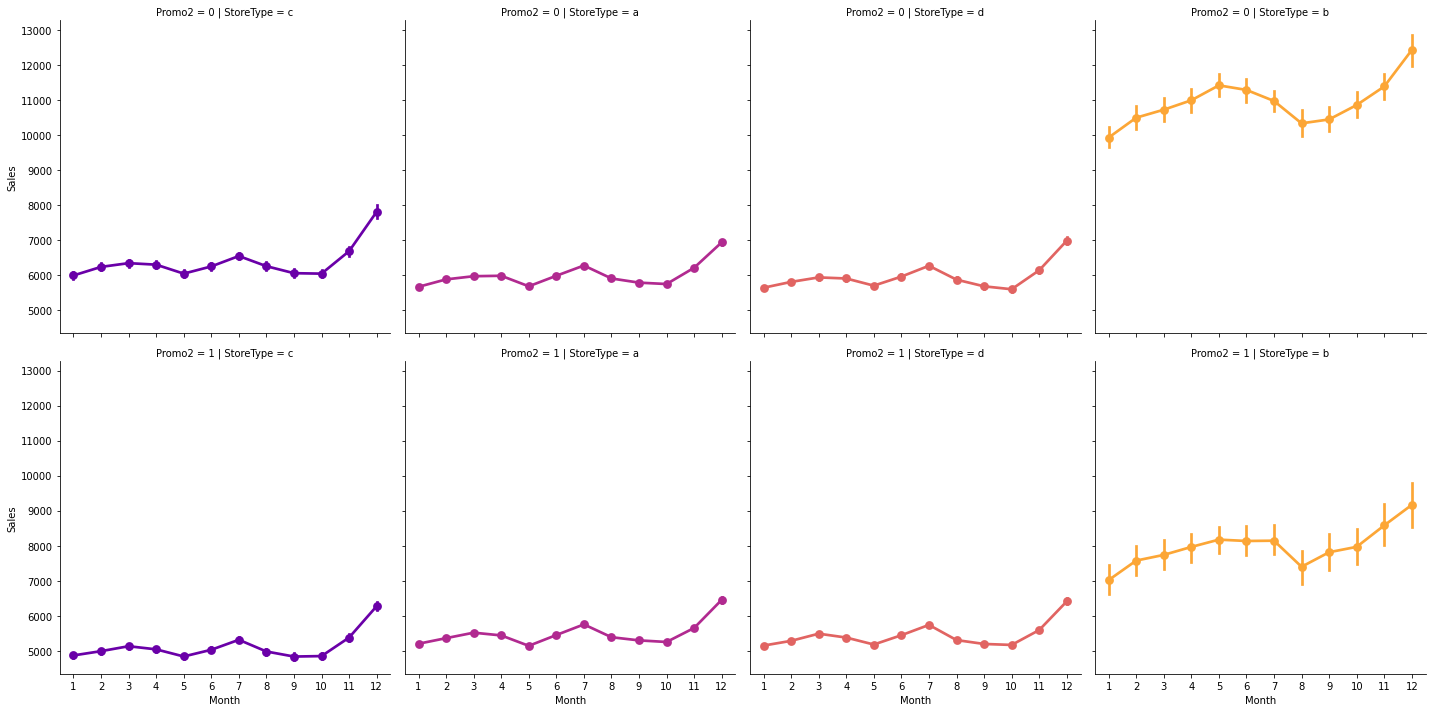

In [45]:
factor_plot("Month","Sales","StoreType","Promo2",train_store_joined)

/home/gaurav/anaconda3/envs/mynewenv/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


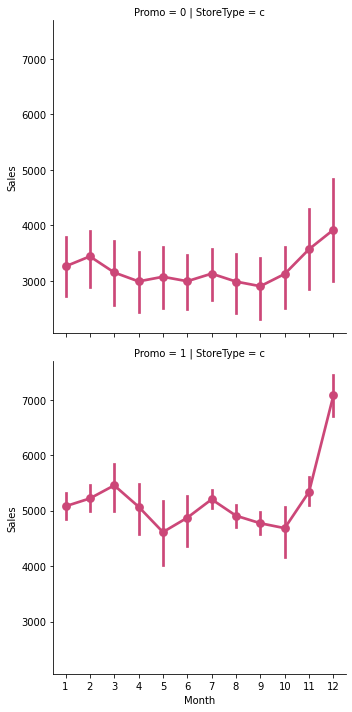

In [46]:
factor_plot("Month","Sales","StoreType","Promo",train_store_group.get_group(1))

/home/gaurav/anaconda3/envs/mynewenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


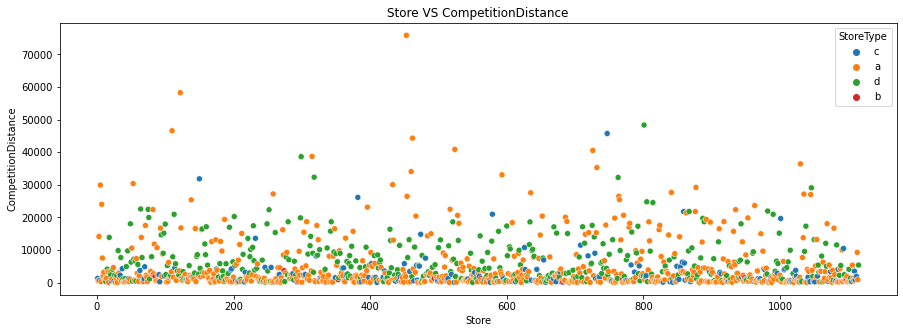

In [47]:
plt.figure(figsize=(15,5))
sns.scatterplot(store_df.Store,store_df.CompetitionDistance,hue=store_df.StoreType)
plt.title("Store VS CompetitionDistance")
plt.show()

/home/gaurav/anaconda3/envs/mynewenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


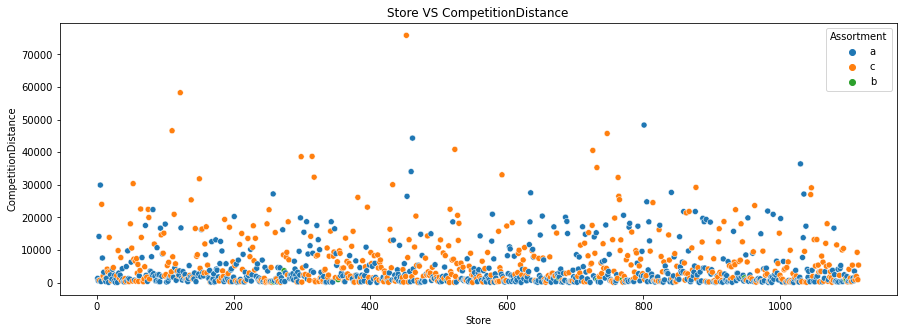

In [48]:
plt.figure(figsize=(15,5))
sns.scatterplot(store_df.Store,store_df.CompetitionDistance,hue=store_df.Assortment)
plt.title("Store VS CompetitionDistance")
plt.show()

/home/gaurav/anaconda3/envs/mynewenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


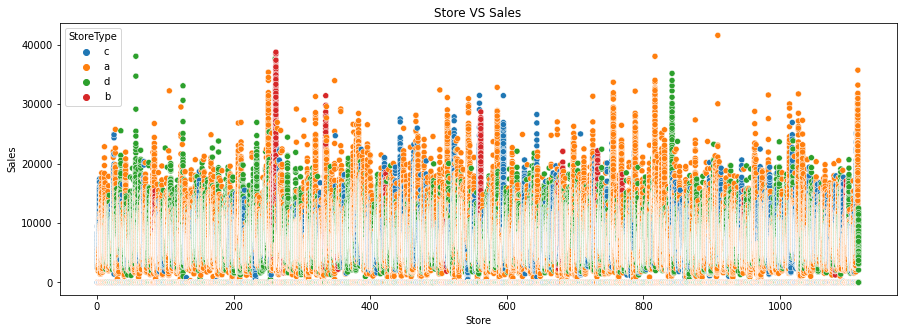

In [49]:
plt.figure(figsize=(15,5))
sns.scatterplot(train_store_joined.Store,train_store_joined.Sales,hue=train_store_joined.StoreType)
plt.title("Store VS Sales")
plt.show()

In [52]:
def time_series(df):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.plot(df['Sales'])
    plt.title('Store Sales')
    plt.show()

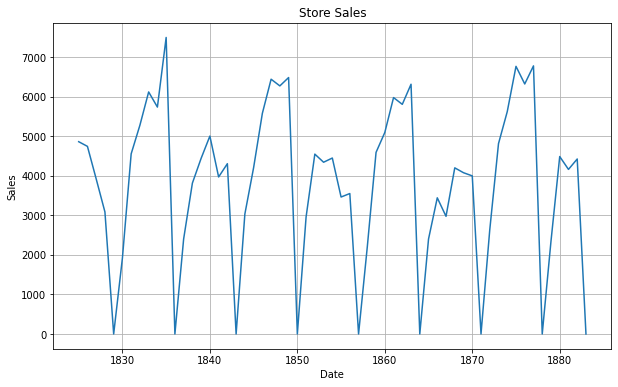

In [65]:
df=train_store_group.get_group(2)
time_series(df[df["Date"].astype(str)<'2013-02-30'])

In [62]:
train_store_group.get_group(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,...,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
942,2,5,2015-07-31,6064,625,1,1,0,1,31,...,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
943,2,4,2015-07-30,5567,601,1,1,0,1,30,...,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
944,2,3,2015-07-29,6402,727,1,1,0,1,29,...,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
945,2,2,2015-07-28,5671,646,1,1,0,1,28,...,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
946,2,1,2015-07-27,6627,638,1,1,0,1,27,...,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,2,6,2013-01-05,2342,324,1,0,0,0,5,...,2013,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1880,2,5,2013-01-04,4484,574,1,0,0,1,4,...,2013,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1881,2,4,2013-01-03,4159,555,1,0,0,1,3,...,2013,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1882,2,3,2013-01-02,4422,650,1,0,0,1,2,...,2013,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


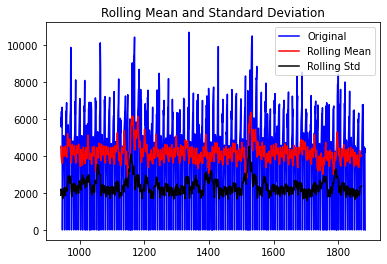

Results of dickey fuller test
Test Statistics               -6.369024e+00
p-value                        2.370295e-08
No. of lags used               2.100000e+01
Number of observations used    9.200000e+02
critical value (1%)           -3.437478e+00
critical value (5%)           -2.864687e+00
critical value (10%)          -2.568445e+00
dtype: float64


Strong evidence against Null hyposthesis time series data has no unit root and Hence is Stationary


In [61]:

test_stationarity(train_store_group.get_group(2).sort_values('Date')["Sales"])

In [63]:
train_store_group.get_group(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,...,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
942,2,5,2015-07-31,6064,625,1,1,0,1,31,...,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
943,2,4,2015-07-30,5567,601,1,1,0,1,30,...,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
944,2,3,2015-07-29,6402,727,1,1,0,1,29,...,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
945,2,2,2015-07-28,5671,646,1,1,0,1,28,...,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
946,2,1,2015-07-27,6627,638,1,1,0,1,27,...,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,2,6,2013-01-05,2342,324,1,0,0,0,5,...,2013,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1880,2,5,2013-01-04,4484,574,1,0,0,1,4,...,2013,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1881,2,4,2013-01-03,4159,555,1,0,0,1,3,...,2013,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1882,2,3,2013-01-02,4422,650,1,0,0,1,2,...,2013,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
